In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from xgboost import plot_importance

In [3]:
digits = datasets.load_digits()

In [4]:
digits.data.shape,digits.target.shape

((1797, 64), (1797,))

In [5]:
x_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.3,random_state=33)

In [6]:
model = XGBClassifier(learning_rate = 0.1,
                      n_estimators=1000,   #树的个数
                      max_depth=6,           #树的深度
                      min_child_weight=1,  #叶子节点最小权重
                      gamma=0.,              #惩罚项中叶子结点个数前的参数
                      subsample=0.8,       #随机选择80%样本建立决策树
                      colsample_btree=0.8,#随机选择80%特征建立决策树
                      objective = 'multi:softmax',#指定损失函数
                      scale_pos_weight=1,  #解决样本个数不平衡问题
                      random_state=27,     #随机数
                     )

In [7]:
model.fit(x_train,y_train,
          eval_set=[(x_test,y_test)],   #评估数据集，list类型
          eval_metric='mlogloss',      #评估标准（多分类问题，使用mlogloss作为损失函数）
          early_stopping_rounds=10, #如果模型的loss十次内没有减小，则提前结束模型训练
          verbose=True)                 #True显示，False不显示

[0]	validation_0-mlogloss:1.96846
Will train until validation_0-mlogloss hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:1.74032
[2]	validation_0-mlogloss:1.56439
[3]	validation_0-mlogloss:1.42127
[4]	validation_0-mlogloss:1.30035
[5]	validation_0-mlogloss:1.19639
[6]	validation_0-mlogloss:1.10532
[7]	validation_0-mlogloss:1.02167
[8]	validation_0-mlogloss:0.951119
[9]	validation_0-mlogloss:0.889099
[10]	validation_0-mlogloss:0.83269
[11]	validation_0-mlogloss:0.78206
[12]	validation_0-mlogloss:0.73734
[13]	validation_0-mlogloss:0.694279
[14]	validation_0-mlogloss:0.657019
[15]	validation_0-mlogloss:0.622691
[16]	validation_0-mlogloss:0.589271
[17]	validation_0-mlogloss:0.560893
[18]	validation_0-mlogloss:0.533195
[19]	validation_0-mlogloss:0.5085
[20]	validation_0-mlogloss:0.485929
[21]	validation_0-mlogloss:0.46516
[22]	validation_0-mlogloss:0.446692
[23]	validation_0-mlogloss:0.428037
[24]	validation_0-mlogloss:0.411434
[25]	validation_0-mlogloss:0.397447
[26]	validation_0-m

[224]	validation_0-mlogloss:0.131941
[225]	validation_0-mlogloss:0.131963
[226]	validation_0-mlogloss:0.131964
[227]	validation_0-mlogloss:0.13193
[228]	validation_0-mlogloss:0.131989
[229]	validation_0-mlogloss:0.131781
[230]	validation_0-mlogloss:0.131675
[231]	validation_0-mlogloss:0.131468
[232]	validation_0-mlogloss:0.131412
[233]	validation_0-mlogloss:0.131389
[234]	validation_0-mlogloss:0.131312
[235]	validation_0-mlogloss:0.131221
[236]	validation_0-mlogloss:0.131172
[237]	validation_0-mlogloss:0.131124
[238]	validation_0-mlogloss:0.131172
[239]	validation_0-mlogloss:0.131074
[240]	validation_0-mlogloss:0.131079
[241]	validation_0-mlogloss:0.131123
[242]	validation_0-mlogloss:0.131024
[243]	validation_0-mlogloss:0.13092
[244]	validation_0-mlogloss:0.130856
[245]	validation_0-mlogloss:0.130743
[246]	validation_0-mlogloss:0.130579
[247]	validation_0-mlogloss:0.130527
[248]	validation_0-mlogloss:0.130496
[249]	validation_0-mlogloss:0.130484
[250]	validation_0-mlogloss:0.130458
[25

XGBClassifier(base_score=0.5, booster='gbtree', colsample_btree=0.8,
       colsample_bylevel=1, colsample_bytree=1, gamma=0.0,
       learning_rate=0.1, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
       nthread=None, objective='multi:softprob', random_state=27,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)

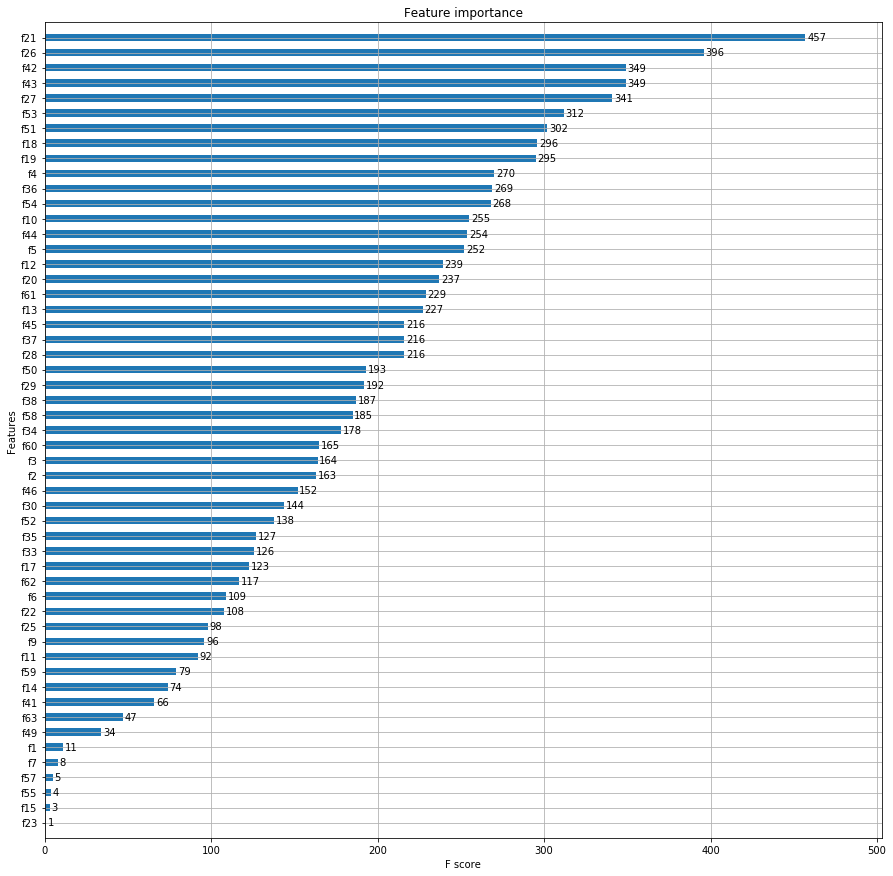

In [8]:
#plot feature importance
fig,ax = plt.subplots(figsize=(15,15))
plot_importance(model,height=0.5,ax=ax,max_num_features=64)

In [9]:
#预测
y_pred= model.predict(x_test)

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [10]:
#模型评估
accuracy = accuracy_score(y_test,y_pred)
print('accuracy:%.2f%%' %(accuracy*100.0))

accuracy:95.74%
